<a href="https://colab.research.google.com/github/ishaqmarashy/Housing-Prices-ML/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Common imports
import pandas as pd
import numpy as np
import sklearn

# Plotting
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Kaggle Data https://www.kaggle.com/competitions/digit-recognizer/overview
# From CSV to Pandas DataFrame
train_df = pd.read_csv( "./train.csv",index_col=0)
test_df = pd.read_csv("./test.csv",index_col=0)
# Get a description of the dataset showing missing data and datatypes
# Int expects columns to be completely filled by pandas and those columns maybe be labeled as float if they contain null values
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Combines the test data and training data 
# This is essential when onehot encoding or using pandas dummy data to handle multicategorical data
# as some examples may not have been seen in the training data but may be present in the test data
df=pd.concat((train_df, test_df))
df.drop(['SalePrice'], axis=1, inplace=True)
# Drop all columns with more than 40% missing data
missing=df.isna().sum()
for i in missing.index:
  if missing[i]/len(df)>0.6:
    print('Drop',i,missing[i],missing[i]/len(df),'Missing')
    df.drop([i], axis=1, inplace=True)
# Creates imputers to fill in missing data using the mean for numerical data or most frequent for categorical data
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric=df.select_dtypes(exclude='object')
df[numeric.columns]=pd.DataFrame(imp.fit_transform(numeric),columns=numeric.columns,index=df.index)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
included=df.select_dtypes(include='object')
df[included.columns]=pd.DataFrame(imp.fit_transform(included),columns=included.columns,index=df.index)
sp=train_df['SalePrice']
# Gets dummy data. This function conveniently converts multicategorical data into binary encoded class columns  
df = pd.get_dummies(df)
# splits the data back into its origional test train split
ntrain = train_df.shape[0]
ntest = train_df.shape[0]
train_df = df[:ntrain]
test_df = df[ntrain:]
train_df['SalePrice']=sp
numeric['SalePrice']=sp
print('------------\n')
train_df.columns

Drop Alley 2721 0.9321685508735869 Missing
Drop PoolQC 2909 0.9965741692360397 Missing
Drop Fence 2348 0.8043850633778691 Missing
Drop MiscFeature 2814 0.9640287769784173 Missing
------------



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SalePrice'],
      dtype='object', length=276)

In [4]:
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0,0,1,0,0,0,0,1,0,208500
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0,0,1,0,0,0,0,1,0,181500
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0,0,1,0,0,0,0,1,0,223500
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0,0,1,1,0,0,0,0,0,140000
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,175000
1457,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0,0,1,0,0,0,0,1,0,210000
1458,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0,0,1,0,0,0,0,1,0,266500


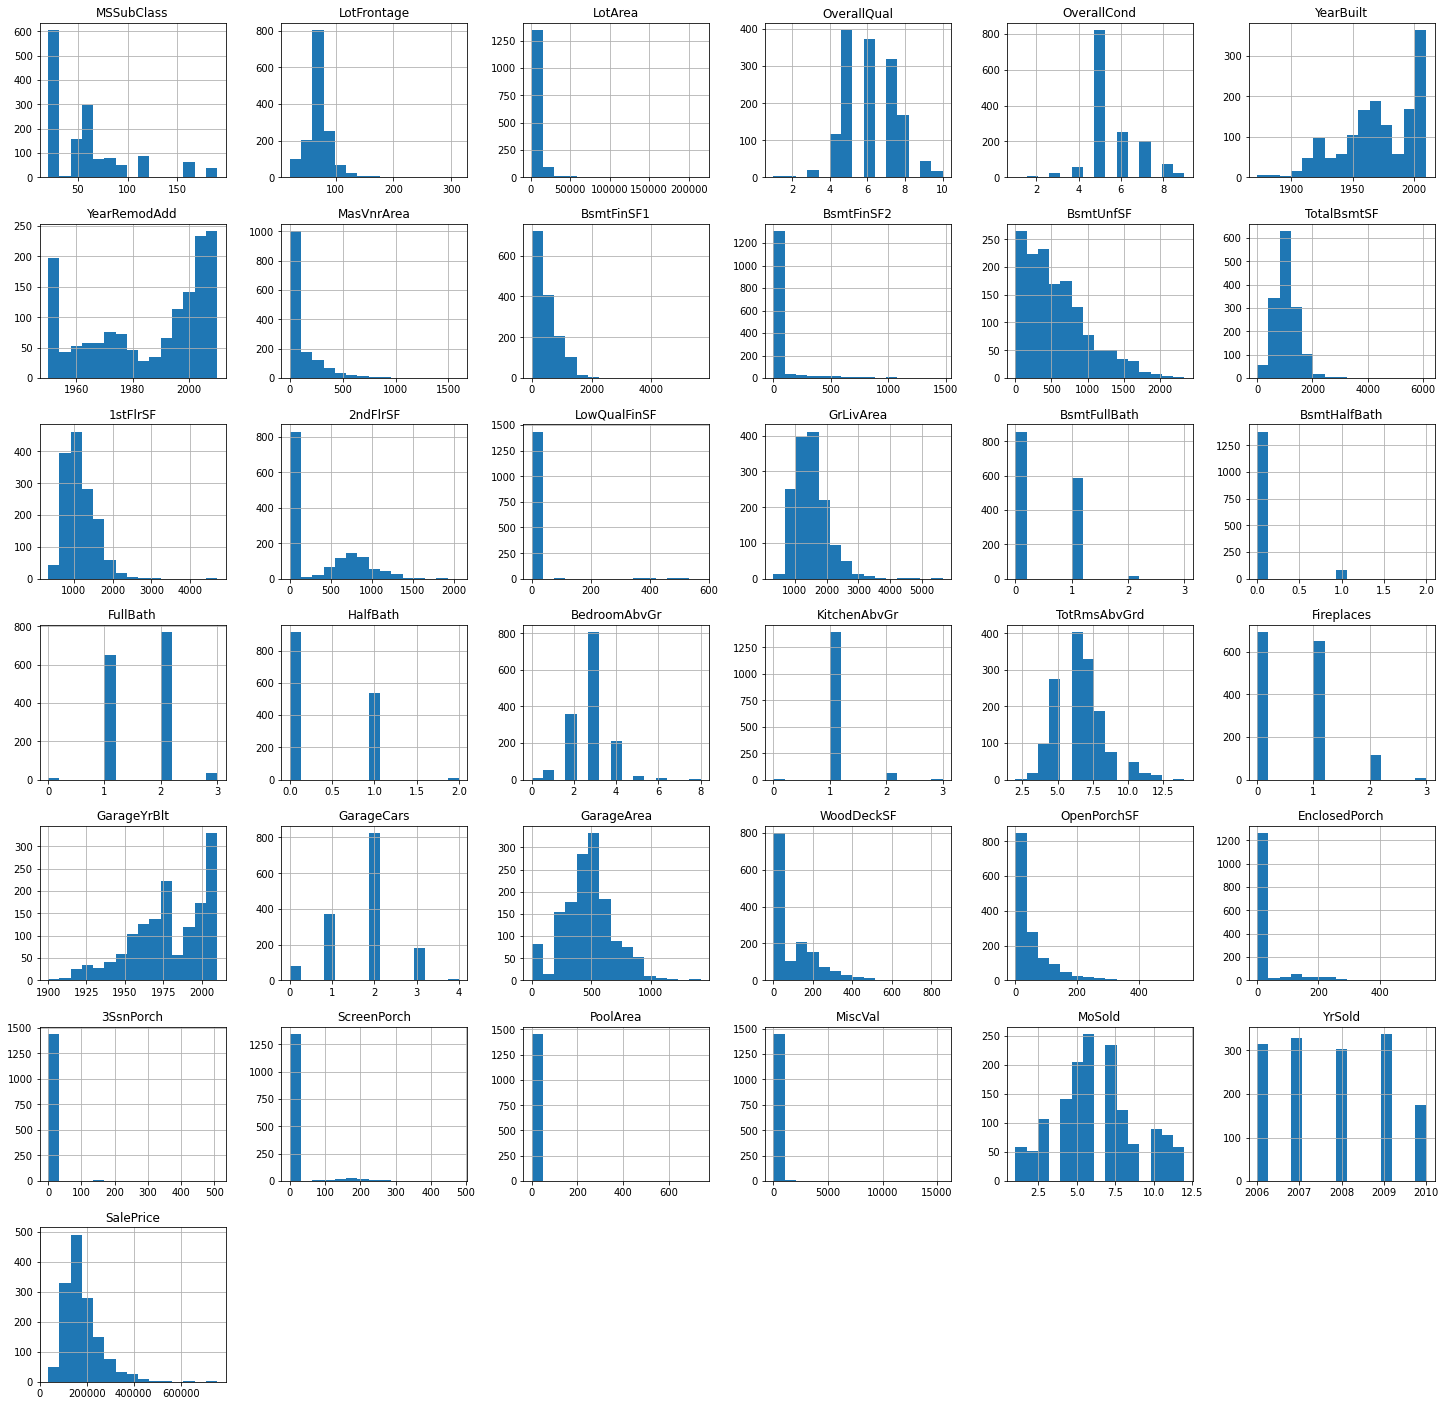

In [5]:
# Plot the numeric data to find patterns
train_df[numeric.columns].hist(bins=15, figsize=(25,25))
plt.show()

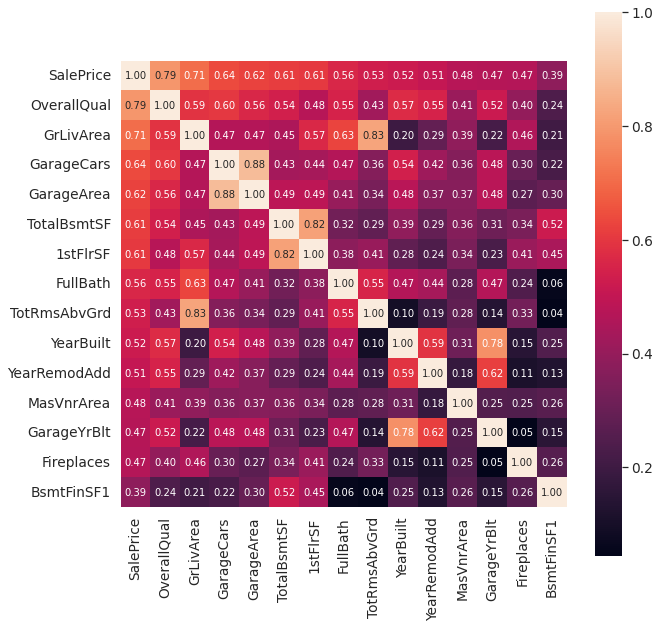

In [6]:
# Create a correlation matrix to find what data may potentially be more important in feature selection
corrmat = train_df[numeric.columns].corr()
plt.figure(figsize=(10,10))
# Pick 15 highest correlated features relative to saleprice
columns = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(train_df[columns].values.T)
# Plot these features
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

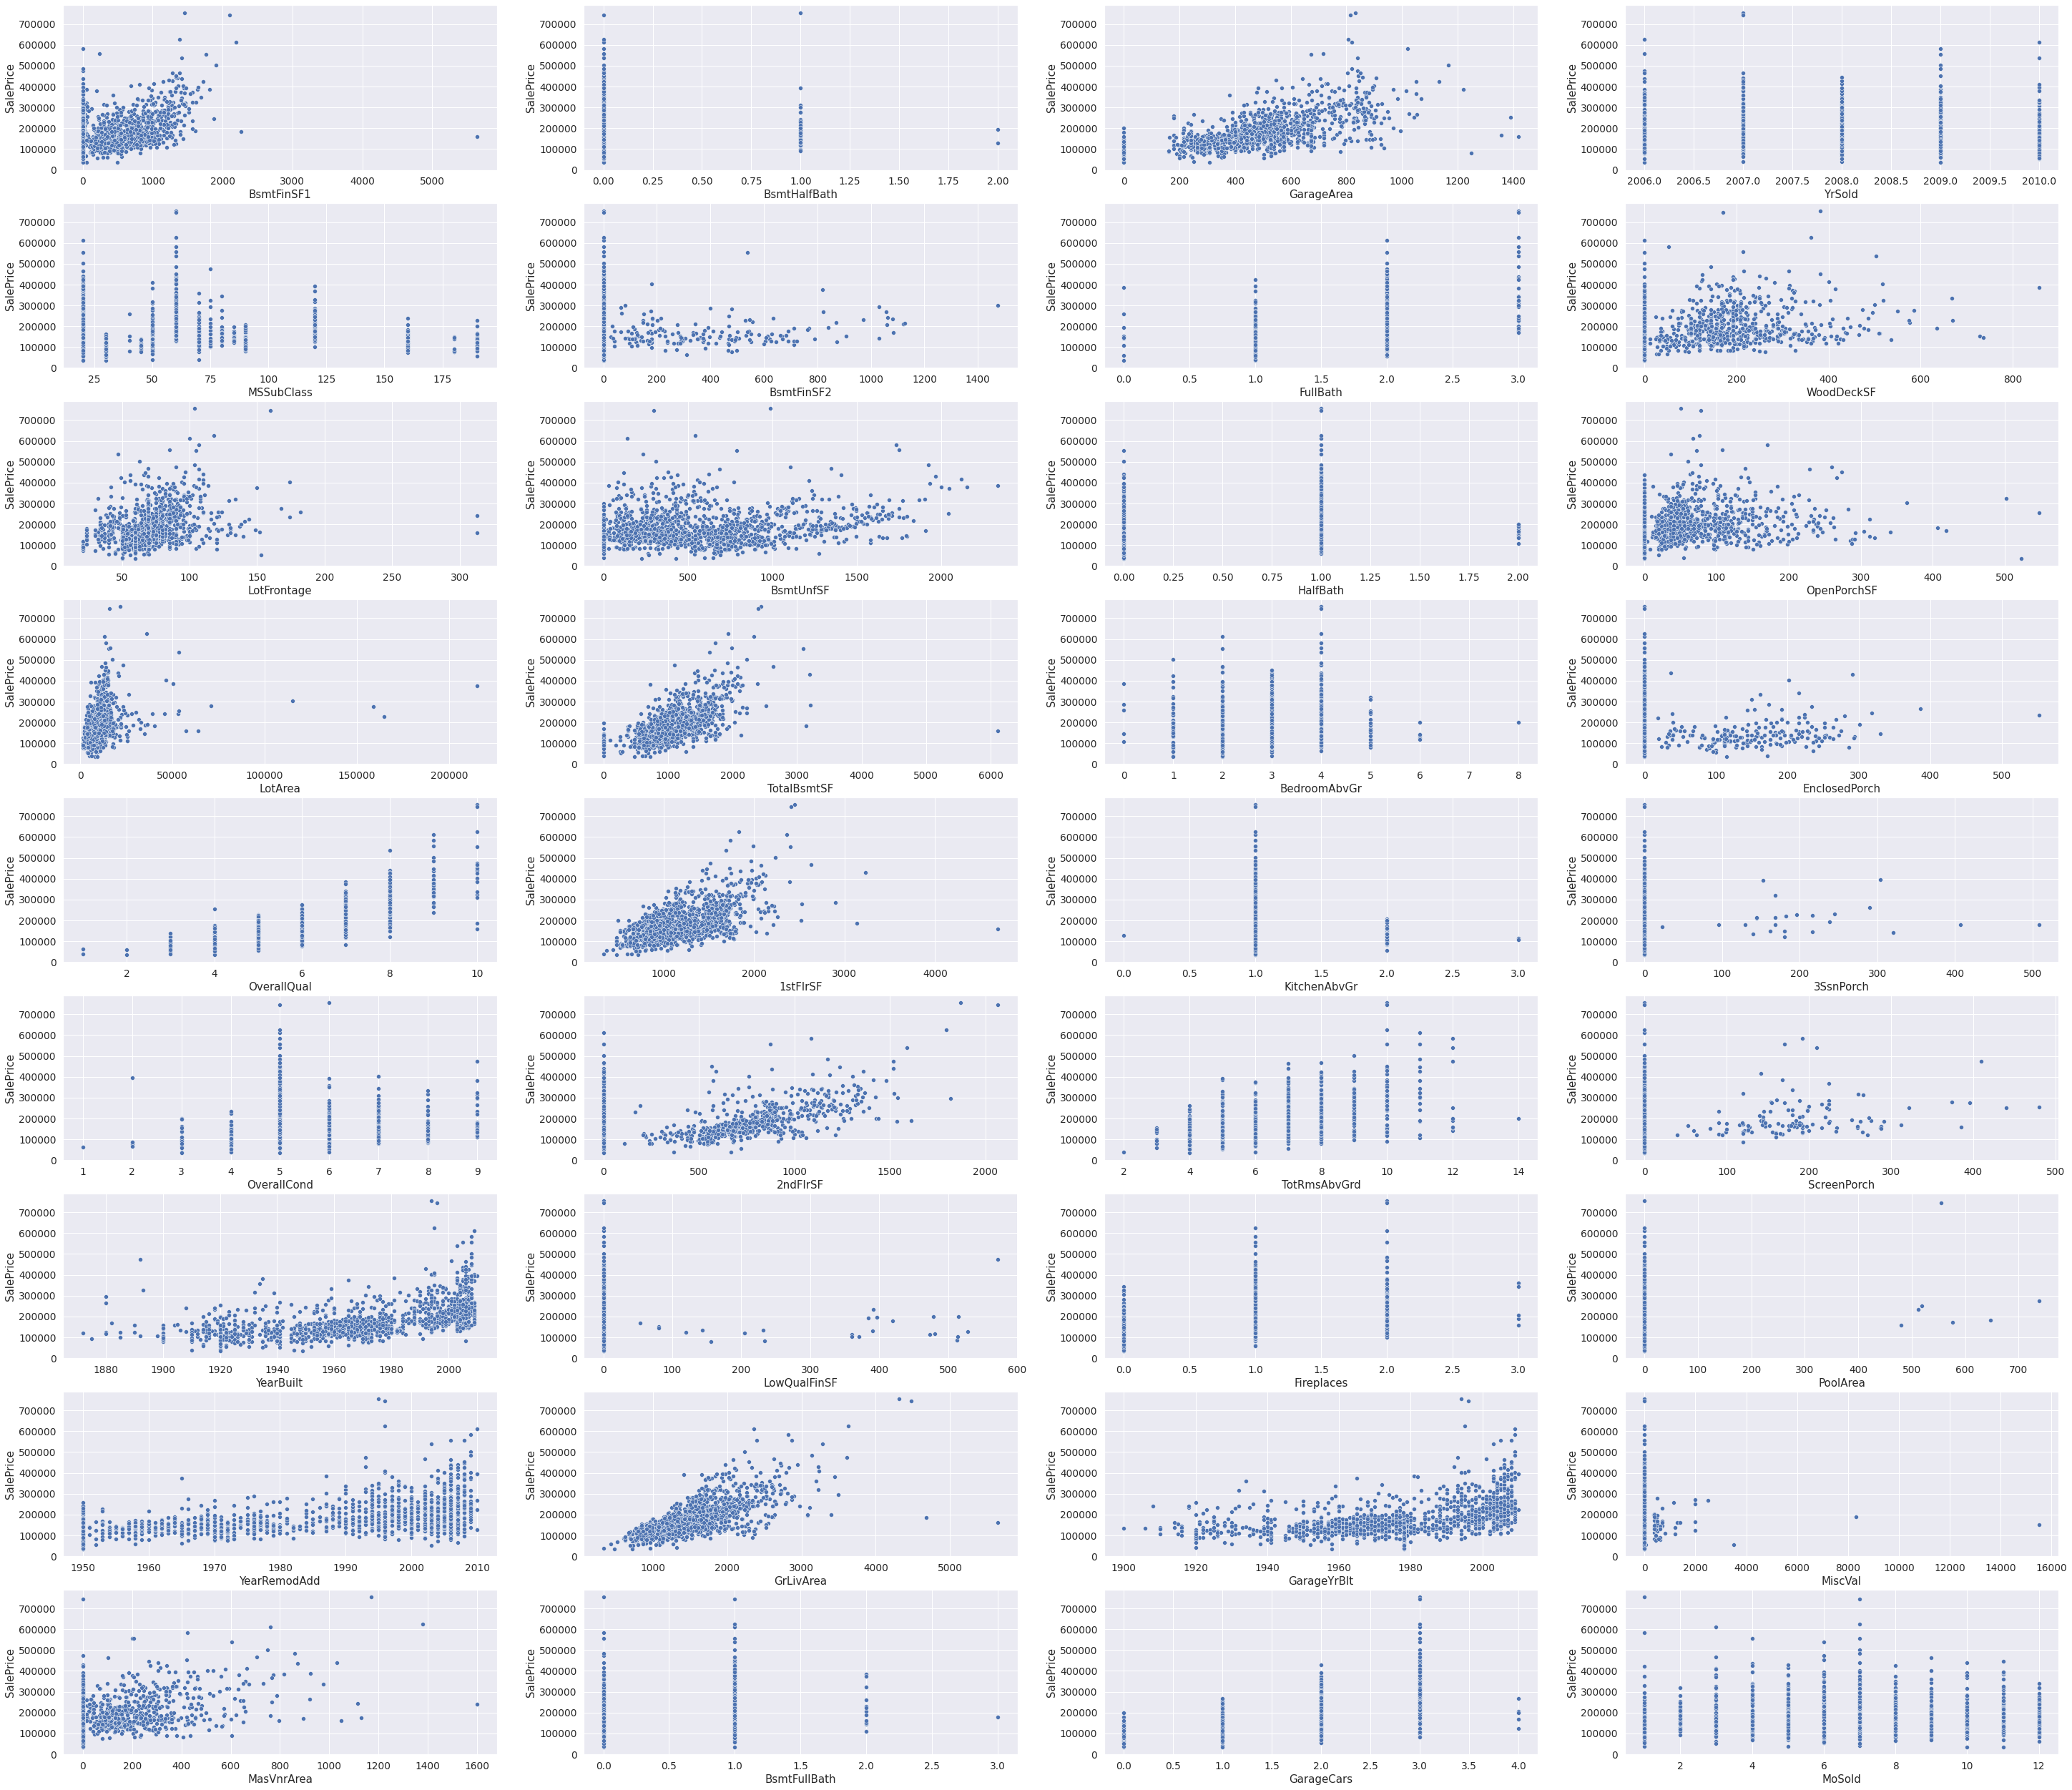

In [7]:
from pandas.plotting import scatter_matrix

# Plot scatter matrix to find potential outliers
temp={}
c=0
k=9
j=0
fig5, axs = plt.subplots(k,4, figsize=(50, 45))
for i in numeric.columns.drop('SalePrice'):
  if(c%k==0 and c!=0):
    j+=1
  c+=1  
  temp[i] = sns.scatterplot(x=train_df[i], y=train_df['SalePrice'],data=train_df, ax=axs[c%k,j])
plt.show()

In [8]:
# Remove outliers
train_df = train_df[train_df.TotalBsmtSF < 4500]
train_df = train_df[train_df.GrLivArea < 4500]
train_df = train_df[train_df.GarageArea < 1200]
train_df = train_df[train_df['1stFlrSF'] < 4000]
train_df = train_df[train_df.BsmtFinSF1 < 4000]

In [9]:
from sklearn.model_selection import train_test_split
# Split data into training and validation set
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]
X_Pred=test_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

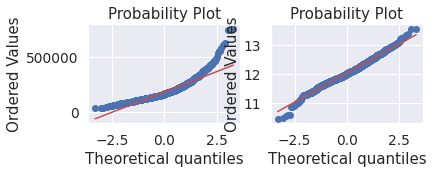

In [10]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 

fig = plt.figure()
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
plt1 = stats.probplot(y, plot=ax)
plt2 = stats.probplot(np.log1p(y), plot=ax1)
plt.show()

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_log_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
predictions=pd.DataFrame(y_train,index=y_train.index)
# Uses various machine learning algorithms to predict housing prices and displays their scores

In [12]:
lr = make_pipeline(OneHotEncoder(handle_unknown='ignore'),LinearRegression())
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred=lr.predict(X_test)
lr.score(X_test, y_test)
predictions['LinearRegression']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

9.002348005863267e-14

In [13]:
xgb =  make_pipeline(RobustScaler(),XGBRegressor(reg='squarederror'))
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
xgb.score(X_test, y_test)
predictions['XGBRegressor']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

[13:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.006962731768236306

In [14]:
enr = make_pipeline(RobustScaler(), ElasticNet(alpha=0.001, l1_ratio=.9, random_state=42))
enr.fit(X_train, y_train)
y_pred_train = enr.predict(X_train)
y_pred_test = enr.predict(X_test)
enr.score(X_test, y_test)
predictions['ElasticNet']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

0.010921820917159441

In [15]:
kr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kr.fit(X_train, y_train)
y_pred_train = kr.predict(X_train)
y_pred_test = kr.predict(X_test)
kr.score(X_test, y_test)
predictions['KernelRidge']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

1.048908590580868e-05

In [16]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.001, random_state=42))
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
lasso.score(X_test, y_test)
predictions['Lasso']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

0.010917334075957795

In [17]:
gbr = GradientBoostingRegressor(n_estimators=3000, max_depth=4, min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
gbr.fit(X_train, y_train)
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)
gbr.score(X_test, y_test)
predictions['GradientBoostingRegressor']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

0.0009791650524090941

In [18]:
from mlxtend.regressor import StackingCVRegressor

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.0001)

# stack multiple regressors to make a prediction
# https://www.kaggle.com/code/amrmahmoud123/1-guide-to-ensembling-methods/notebook

scv = StackingCVRegressor(regressors=(lr, lasso, enr, gbr, xgb, kr),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
scv.fit(np.array(X_train), np.array(y_train))
y_pred_train = scv.predict(X_train)
y_pred_test = scv.predict(X_test)
scv.score(X_test, y_test)
predictions['StackingCVRegressor']=y_pred_train
mean_squared_log_error(y_train,y_pred_train)

[13:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.002071681199907963

In [19]:
predictions

,SalePrice,LinearRegression,XGBRegressor,ElasticNet,KernelRidge,Lasso,GradientBoostingRegressor,StackingCVRegressor
Id,,,,,,,,
893,154500,154499.977349,147463.984375,154009.621296,154831.433594,154302.050821,154073.300813,149782.718750
302,267000,267000.010536,278887.156250,259358.390538,266951.664062,258870.778373,267012.355452,261618.343750
1275,139000,139000.041999,135772.953125,140267.519328,139325.298828,140064.426568,138959.882722,135250.921875
1439,149700,149699.985206,144752.125000,154147.097024,149760.140625,153423.100077,149689.056953,149889.375000
1361,189000,188999.953329,182270.703125,216342.556918,189008.847656,216661.910400,189090.566086,199909.578125
...,...,...,...,...,...,...,...,...
536,107500,107500.023222,128441.000000,152201.006504,107483.419922,153031.987241,107697.734588,114841.578125
343,87500,87500.059809,82194.773438,89893.949536,87566.324219,90283.766680,88374.117032,87684.281250
136,174000,173999.972718,177348.687500,183285.704339,174332.531250,183314.228380,173904.520047,172740.734375


In [20]:
# y_pred_test=scv.predict(X_Pred)
# X_Pred['SalePrice']=y_pred_test
# y_pred_test_df=X_Pred['SalePrice']
# X_Pred=X_Pred.drop(columns=['SalePrice'])
# y_pred_test_df.to_csv('submission.csv', index=False)